In [50]:
#Notebook to analyze data from game changer seasonal stat export

In [51]:
#import packages

import pandas as pd
from matplotlib import pyplot as plt

In [52]:
initial_df = pd.read_csv('../data/gcstats09062022.csv')

In [53]:
#In the first row of the seasonal stats csv, there are 3 columm values. 'Batting', 'Pitching', and 'Fielding'
#We want to slice the data from column1 to the 'Pitching' value, and call it initial_batting_df_plus_pitching.

initial_batting_df_plus_pitching = initial_df.loc[:,:'Pitching']

#Drop the 'Pitching' column and call the new dataframe, initial_batting_df

initial_batting_df = initial_batting_df_plus_pitching.drop(['Pitching'], axis=1)


In [54]:
#Slice the csv from 'Pitching' to the end of the csv columns'

initial_pitching_df = initial_df.loc[:,'Pitching':]

In [55]:
#we need to change the column header row from the "unamed" headers to the first row in the csv which contain headers like "AVG", "OBS", etc

#grab the first row for the header
new_batting_header = initial_batting_df.iloc[0]
new_pitching_header = initial_pitching_df.iloc[0]

#take the data minus the header row
initial_batting_df_drop_header_row = initial_batting_df[1:]
initial_pitching_df_drop_header_row = initial_pitching_df[1:]

#set the header row as the df header
initial_batting_df_drop_header_row.columns = new_batting_header
initial_pitching_df_drop_header_row.columns = new_pitching_header


In [56]:
#drop the row that contains the glossary
initial_batting_df_drop_glossary = initial_batting_df_drop_header_row[initial_batting_df_drop_header_row.Number != "Glossary"]


In [57]:
#drop rows where the 'Number'j column contains nulls
initial_batting_df_drop_nan = initial_batting_df_drop_glossary[initial_batting_df_drop_glossary['Number'].notna()]

initial_batting_df_drop_total = initial_batting_df_drop_nan[initial_batting_df_drop_nan['First'].notna()]

In [58]:

#initial_batting_df_drop_nan["Number"] = initial_batting_df_drop_nan["Number"].astype(int)
initial_batting_df_drop_nan.loc[:,"GP"] = initial_batting_df_drop_nan["GP"].astype(int)
initial_batting_df_drop_nan.loc[:,"AVG"] = initial_batting_df_drop_nan["AVG"].astype(float)
initial_batting_df_drop_nan.loc[:,"OBP"] = initial_batting_df_drop_nan["OBP"].astype(float)
initial_batting_df_drop_nan.loc[:,"OPS"] = initial_batting_df_drop_nan["OPS"].astype(float)
initial_batting_df_drop_nan.loc[:,"First"] = initial_batting_df_drop_nan["First"].astype(str)

initial_batting_df_drop_total.loc[:,"GP"] = initial_batting_df_drop_total["GP"].astype(int)
initial_batting_df_drop_total.loc[:,"AVG"] = initial_batting_df_drop_total["AVG"].astype(float)
initial_batting_df_drop_total.loc[:,"OBP"] = initial_batting_df_drop_total["OBP"].astype(float)
initial_batting_df_drop_total.loc[:,"OPS"] = initial_batting_df_drop_total["OPS"].astype(float)
initial_batting_df_drop_total.loc[:,"First"] = initial_batting_df_drop_total["First"].astype(str)

/Users/danielhighsmith/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


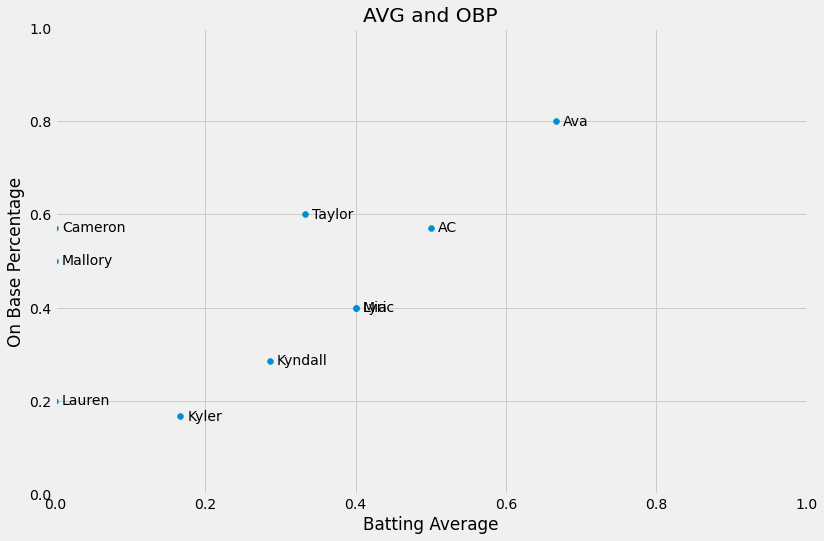

In [59]:
# Plot the AVG column on the x-axis and the OBP column on the y-axis
# plt.xlim and plt.ylim moves the graph out to 1.0 which is a 1000 batting average and 1000 on base percentage
# plt.figure increases the plot size so the scatter plot is not so crowded
fig = plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(initial_batting_df_drop_total["AVG"], initial_batting_df_drop_total["OBP"])
plt.xlabel("Batting Average")
plt.ylabel('On Base Percentage')
plt.title('AVG and OBP')
plt.grid()
plt.xlim((0,1))
plt.ylim((0,1))


for x_pos, y_pos, label in zip(initial_batting_df_drop_total["AVG"], initial_batting_df_drop_total["OBP"], initial_batting_df_drop_total["First"]):
    plt.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# plt.savefig('avg_obp.png') 
# gc_team_t = np.transpose(gc_team)

#plt.grid() shows grid lines on the plot
plt.grid()

plt.show()

<BarContainer object of 10 artists>

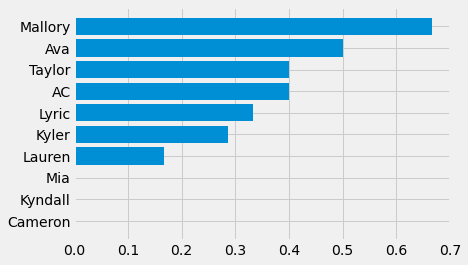

In [60]:
#horizontal bar chare of batting averages, sorted AVG with the sorted() function
plt.barh(initial_batting_df_drop_total.First, sorted(initial_batting_df_drop_total.AVG))
